In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
%matplotlib inline

Data Analysis

In [2]:
res = pd.read_csv('res.csv')

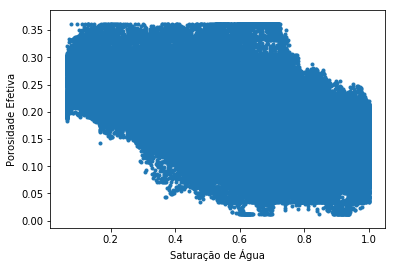

In [3]:
plt.scatter(res['SW'],res['phie'],marker=".")
plt.xlabel('Saturação de Água')
plt.ylabel('Porosidade Efetiva')
#plt.colorbar(label='Altura sobre OWC')
plt.show()

Gap Statistic

In [212]:
from sklearn.cluster import *
from sklearn import preprocessing

In [229]:
data0=preprocessing.scale(res[['SW','phie','GR','ILD','RHOB']])
data1=preprocessing.scale(res[['SW','phie']])

In [267]:
nks=10
numref=100

In [93]:
wcss0=[]
wcss1=[]
for k in tqdm(range(1,nks+1)):
    kmeans = KMeans(k,init='k-means++')
    k0 = kmeans.fit(data0)
    wcss0.append(k0.inertia_)
    k1 = kmeans.fit(data1)
    wcss1.append(k1.inertia_)

In [285]:
nrefs=range(1,numref+1)
temp_data0=[]
temp_data1=[]
for n in tqdm(nrefs):
    temp_data0.append(np.random.random_sample(size=data0.shape))
    temp_data1.append(np.random.random_sample(size=data1.shape))
r_sum0=np.zeros(temp_data0[0].shape)
r_sum1=np.zeros(temp_data1[0].shape)
for i in range(len(nrefs)):
    r_sum0= r_sum0 + temp_data0[i]
    r_sum1= r_sum1 + temp_data1[i]
r_data0 = r_sum0 / len(temp_data0)
r_data1 = r_sum1 / len(temp_data1)

In [268]:
r_wcss0=[]
r_wcss1=[]
for k in tqdm(range(1,nks+1)):
    kmeans = KMeans(k,init='k-means++')
    rk0 = kmeans.fit(r_data0)
    r_wcss0.append(rk0.inertia_)
    rk1 = kmeans.fit(r_data1)
    r_wcss1.append(rk1.inertia_)

In [275]:
std0=np.std(r_data0)
std1=np.std(r_data1)

In [295]:
ws = [wcss0, wcss1, r_wcss0, r_wcss1]
logs=[]
for i in ws:
    logs.append(np.log(i))
gaps0 = logs[2]-logs[0]
gaps1 = logs[3]-logs[1]
g0=[]
g1=[]
for i in range(len(gaps0)-1):
    g0.append(gaps0[i]-gaps0[i+1])
    g1.append(gaps1[i]-gaps1[i+1])

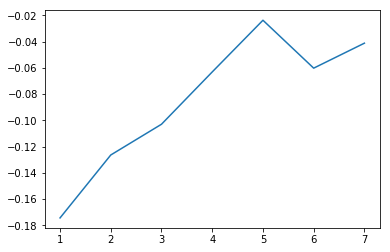

In [307]:
plt.plot(range(1,8),g0[:-2])

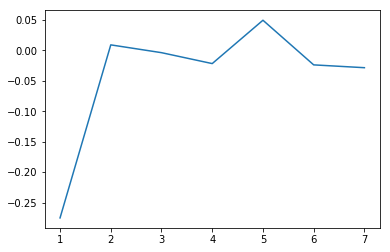

In [297]:
plt.plot(range(1,8),g1[:-2])

In [304]:
nk0=g0.index(np.max(g0[:-2]))+1
nk1=g1.index(np.max(g1[:-2]))+1

In [308]:
kmeans = KMeans(nk0,init='k-means++')
new_data = res.copy()
new_data['Cluster0']=kmeans.fit_predict(data0)
clusters0=new_data['Cluster0']
kmeans = KMeans(nk1,init='k-means++')
new_data['Cluster1']=kmeans.fit_predict(data1)
clusters1=new_data['Cluster1']

In [321]:
for i in new_data['Cluster0'].unique():
    print(i, len(new_data.loc[new_data['Cluster0'] == i]))

1 70117
0 166856
3 113345
4 116739
2 1162


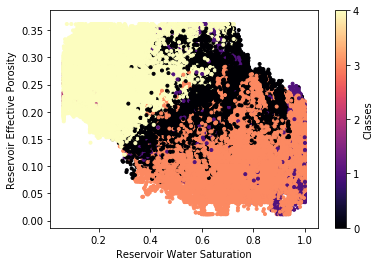

In [311]:
plt.scatter(res['SW'],res['phie'],c=new_data['Cluster0'],marker='.',cmap='magma')
plt.xlabel('Reservoir Water Saturation')
plt.ylabel('Reservoir Effective Porosity')
plt.colorbar(ticks=[0,1,2,3,4],spacing='uniform',label='Classes')
plt.show()

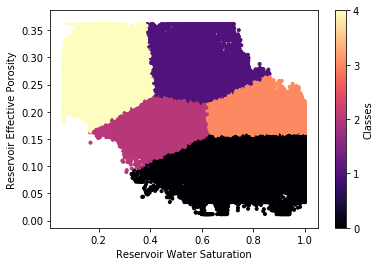

In [312]:
plt.scatter(res['SW'],res['phie'],c=new_data['Cluster1'],marker='.',cmap='magma')
plt.xlabel('Reservoir Water Saturation')
plt.ylabel('Reservoir Effective Porosity')
plt.colorbar(ticks=[0,1,2,3,4],spacing='uniform',label='Classes')
plt.show()

Text(0.5, 0, 'J célula - Inlines')

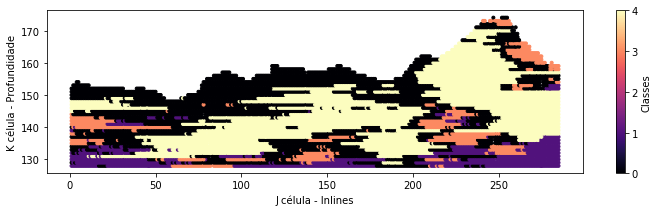

In [313]:
j_slice=int((np.max(new_data['j']))/2)
j_slice_data=new_data.loc[new_data['j'] == j_slice]
xplot = j_slice_data['i']
yplot = j_slice_data['k']
plt.figure(figsize=(12,3))
plt.scatter(xplot,yplot,c=j_slice_data['Cluster0'],marker='.',cmap='magma')
plt.colorbar(ticks=[0,1,2,3,4],spacing='uniform',label='Classes')
plt.ylabel('K célula - Profundidade')
plt.xlabel('J célula - Inlines')

Text(0.5, 0, 'I célula - Crosslines')

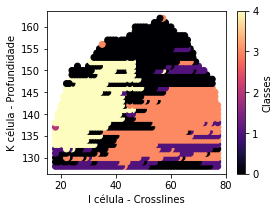

In [314]:
i_slice=int((np.max(new_data['i']))/2)
i_slice_data=new_data.loc[new_data['i'] == i_slice]
xplot = i_slice_data['j']
yplot = i_slice_data['k']
plt.figure(figsize=(4,3))
plt.scatter(xplot,yplot,c=i_slice_data['Cluster0'],cmap='magma')
plt.colorbar(ticks=[0,1,2,3,4],label='Classes')
plt.ylabel('K célula - Profundidade')
plt.xlabel('I célula - Crosslines')

Text(0.5, 0, 'Longitude')

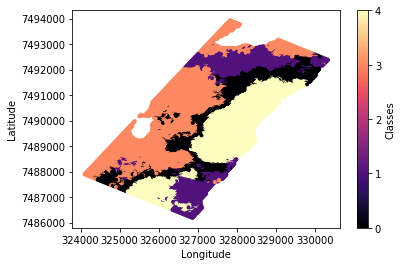

In [315]:
k_slice=int((np.median(new_data['k']))/1)
k_slice_data=new_data.loc[new_data['k'] == k_slice]
xplot = k_slice_data['X']
yplot = k_slice_data['Y']
plt.scatter(xplot,yplot,c=k_slice_data['Cluster0'],marker='.',cmap='magma')
plt.colorbar(ticks=[0,1,2,3,4],spacing='uniform',label='Classes')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

In [316]:
new_data.to_csv('cluster.csv')